(376, 241)


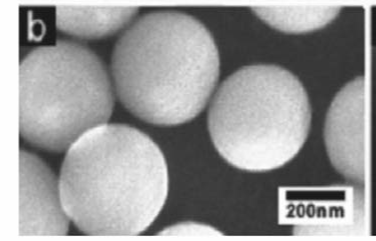

In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#define a function that inserting zeros between rows and columns
def padding(N, M):
    irow = icol = 2*N-1
    i = np.zeros([irow, icol])
    for row in range(irow):
        if row%2 == 0:
            for col in range(icol):
                if col%2 == 0:
                    pos_c = int(col/2)
                    pos_r = int(row/2)
                    i[row, col] = M[pos_r, pos_c]
        else:
            i[row, col] = 0
    return i

%matplotlib inline

#open the target pic
rgb = Image.open("/Users/lrkarley/Desktop/rgb.png")
print(rgb.size)
rgb

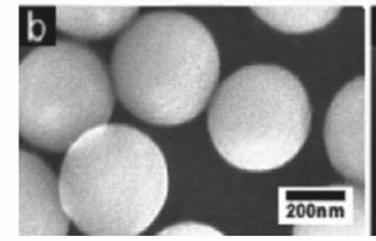

In [84]:
#transforming to grayscale image
grey = rgb.convert('L')
grey

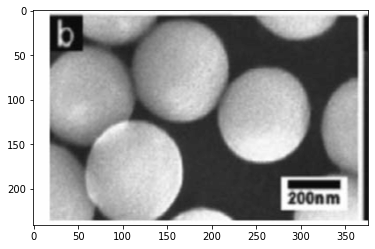

In [85]:
#obtain grayscale data of each pixel
grey = np.array(grey)
plt.imshow(grey,cmap = "gray")

In [86]:
#for the convenience of the experience, intercept square image
grey = grey[0:240,0:240]
print(max(grey.flatten()))
print(min(grey.flatten()))


255
21


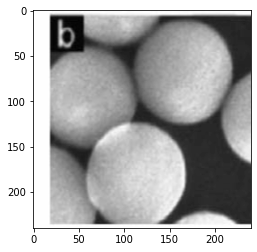

In [87]:
plt.imshow(grey,cmap = "gray")

In [88]:
N =grey.shape[0]
 
#filling 0
sample = padding(N, grey)
sample2 = padding(N, grey)
print(sample)
print(sample.shape)
a = int((sample.shape[0]+1)/2)
b = int((sample.shape[1]-1)/2)
c = int((sample.shape[0]-1)/2)
d = int(sample.shape[1])

[[254.   0. 254. ... 249.   0. 249.]
 [  0.   0.   0. ...   0.   0.   0.]
 [254.   0. 254. ... 251.   0. 251.]
 ...
 [254.   0. 254. ... 254.   0. 254.]
 [  0.   0.   0. ...   0.   0.   0.]
 [254.   0. 254. ... 254.   0. 254.]]
(479, 479)


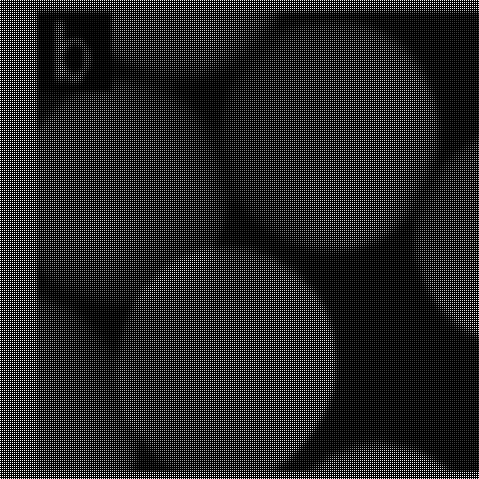

In [89]:
imt = Image.fromarray(np.uint8(sample),'L')
imt

In [90]:
for i in range(a):
    for j in range(b):
        sample[2*i,2*j+1] = (sample[2*i,2*j]+sample[2*i,2*j+2])/2
print(sample)

[[254. 254. 254. ... 249. 249. 249.]
 [  0.   0.   0. ...   0.   0.   0.]
 [254. 254. 254. ... 251. 251. 251.]
 ...
 [254. 254. 254. ... 254. 254. 254.]
 [  0.   0.   0. ...   0.   0.   0.]
 [254. 254. 254. ... 254. 254. 254.]]


In [91]:
for i in range(c):
    for j in range(d):
        sample[2*i+1,j] = (sample[2*i,j]+sample[2*i+2,j])/2
print(sample)

[[254. 254. 254. ... 249. 249. 249.]
 [254. 254. 254. ... 250. 250. 250.]
 [254. 254. 254. ... 251. 251. 251.]
 ...
 [254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]
 [254. 254. 254. ... 254. 254. 254.]]


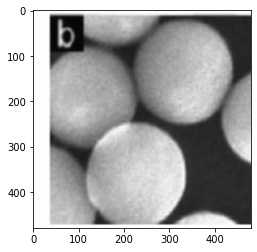

In [92]:
plt.imshow(sample,cmap = "gray")

In [93]:
sample = sample.astype(int)

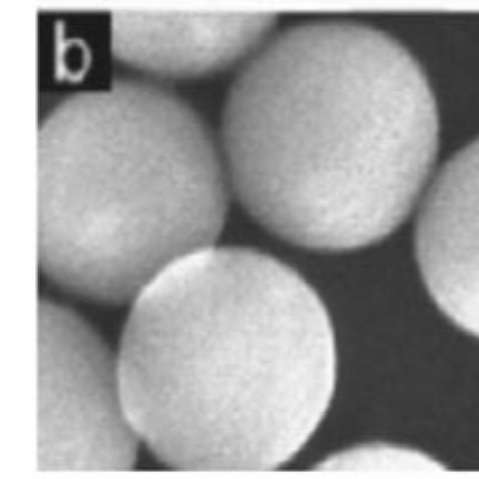

In [94]:
img1 = Image.fromarray(np.uint8(sample),'L')
img1